In [ ]:
#importing library
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
col = ['CustomerID']
df.drop(col,axis=1,inplace=True)

In [ ]:
#encoding the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


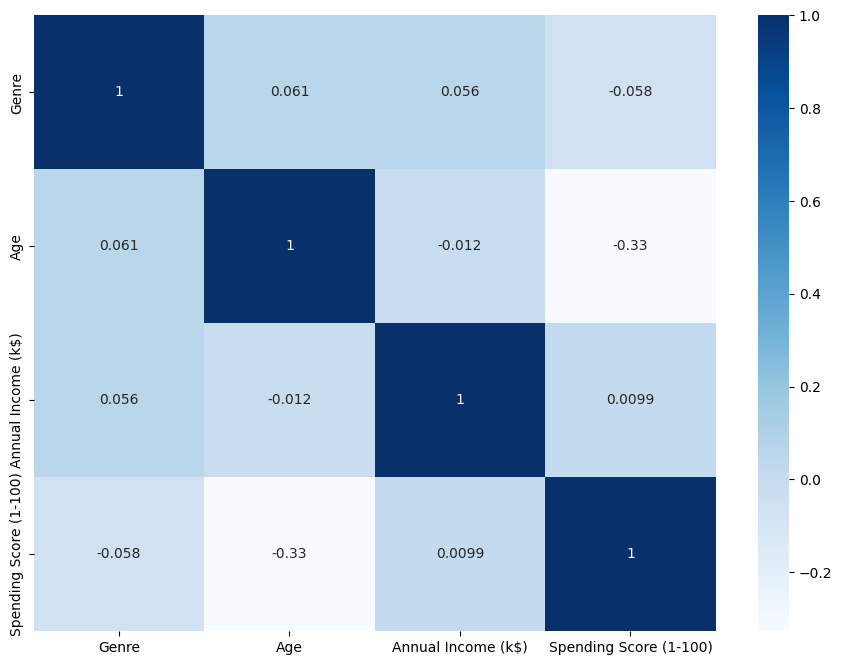

In [ ]:
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()


###**Clustering**

In [ ]:
x=df.iloc[:,-2:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:

from sklearn.cluster import KMeans
wcss=[] # saving wcss (within clusters sum of square)-erroe
for i in range(1,11): #creating clusters from 1 to 11
  kmeans = KMeans(n_clusters=i) #passing i into algorithm
  kmeans.fit(x) #training
  wcss.append(kmeans.inertia_)#finding wcss
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30566.45113025185, 24986.52564064288, 21850.165282585636, 19775.976231256747]


**elbow plot**

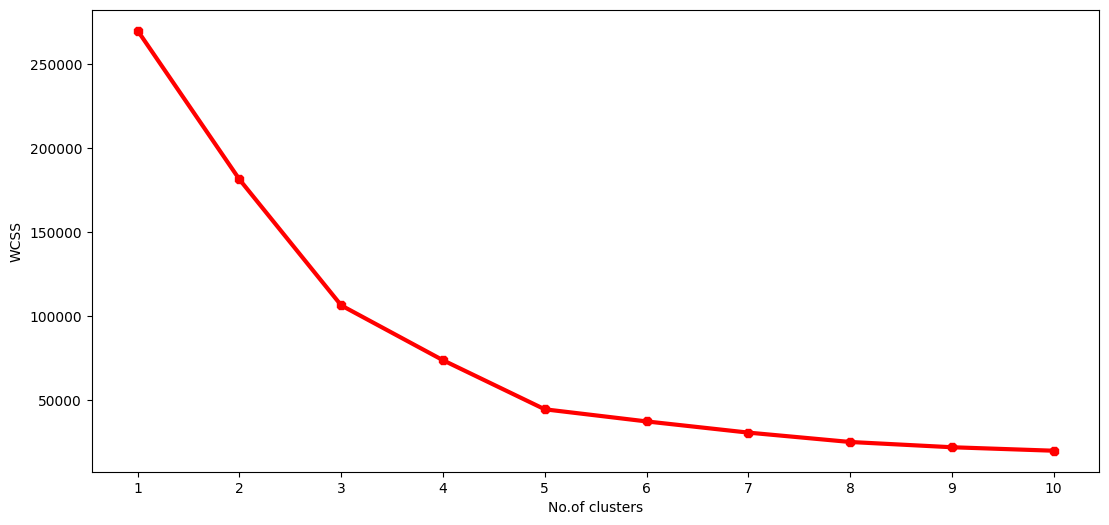

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth = 3,color='red',marker ='8')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
model=KMeans(n_clusters=5)
model.fit(x)
y=model.predict(x)
x['Clusters'] = y
x.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

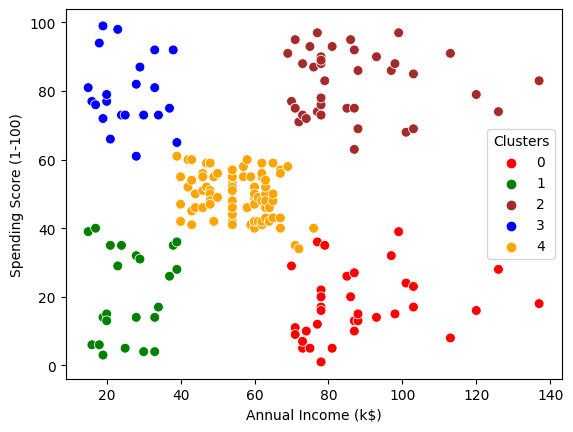

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=x, hue='Clusters', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

Cluster 1 contains customers with high annual income but low spending score.

Cluster 2 contains customers with average annual income and average spending score.

Cluster 3 contains customers with high annual income and high spending score.

Cluster 4 contains customers with low annual income but high spending score.

Cluster 5 contains customers with low annual income and low spending score.

Machine Learning

In [ ]:
x['Clusters'] = y
df=x
df.to_csv('Processed data.csv',header=None)

In [ ]:
colnames = ['Age','Annual income','Spending score','Cluster']
df1=pd.read_csv('/content/Processed data.csv',names=colnames)
x=df1.iloc[:,:-1]
y =df1.iloc[:,-1]

In [ ]:
df1

,Age,Annual income,Spending score,Cluster
0,0,15,39,1
1,1,15,81,3
2,2,16,6,1
3,3,16,77,3
4,4,17,40,1
...,...,...,...,...
195,195,120,79,2
196,196,126,28,0
197,197,126,74,2
198,198,137,18,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.95


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred_model=model.predict(x_test)
print(accuracy_score(y_test,y_pred_model))

0.95


In [ ]:
from sklearn.naive_bayes import MultinomialNB
Mul = MultinomialNB()
Mul.fit(x_train,y_train)
y_pred_Mul=Mul.predict(x_test)
print(accuracy_score(y_test,y_pred_Mul))

0.825


In [ ]:
from sklearn.tree import DecisionTreeClassifier
D = DecisionTreeClassifier()
D.fit(x_train,y_train)
y_pred_D=D.predict(x_test)
print(accuracy_score(y_test,y_pred_D))

0.925


In [ ]:
age=int(input('age'))
Annual_inc = int(input('Enter Annual income:'))
spending_score = int(input('enter spending scoe:'))
data=[[Annual_inc,spending_score,age]]
result = model.predict(data)

if result == 0:
  print('high annual income but low spending sccore')
elif result ==1:
  print('average annual income and average spending score')
elif result==2:
  print('high annual income and high spending score')
elif result==3:
  print('low annual income but high spending score')
else:
  print('low annual income and low spending score')
print(result)
  #19	15	39

age19
Enter Annual income:15
enter spending scoe:39
average annual income and average spending score
[1]


In [ ]:
filename = 'customer_spend_pred_model'
pickle.dump(model,open(filename,'wb'))

In [ ]:
import pickle

In [ ]:
filename = 'customer_spend_pred_model'
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([4, 3, 1, 0, 0, 4, 4, 0, 0, 4, 4, 0, 2, 4, 0, 2, 4, 0, 4, 4, 4, 1,
       0, 4, 4, 4, 4, 4, 2, 4, 3, 1, 4, 4, 0, 4, 2, 2, 0, 4])